# Scraping of Transfermarkt.de web data

### Analysis of the transfer history & behavior of Brighton & Hove Albion (BHA)


Getting insights into the internal transfer logic of BHA


Figuring out what the TOP-Transfers of BHA are split into Arrivals (Zugänge) and Departures (Abgänge)


Preliminary Performance analysis of the TOP-Transfers 

In [1]:
#pip install requests beautifulsoup4

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests

In [3]:
url = 'https://www.transfermarkt.de/brighton-amp-hove-albion/alletransfers/verein/1237'
headers = {'User-Agent': 'Mozilla/5.0'}  # optionally , some websites do require it
response = requests.get(url, headers=headers)

html_content = response.text

In [4]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(html_content, 'html.parser')

In [5]:
# Function to extract and safe transfer data from a given table to list
# Initialize an empty list to store the data
transfer_data = []

# Updated function to add data to the list instead
def extract_transfer_data(table, season, transfer_type):
    rows = table.find_all('tr')[1:]  # Skip header row
    for row in rows:
        columns = row.find_all('td')
        if len(columns) > 2:  # Ensuring there are enough columns
            player_name = columns[0].text.strip()
            from_to_club = columns[2].text.strip()
            fee = columns[3].text.strip() if len(columns) == 4 else 'N/A'  # some rows might not have a fee
            # Append the data as a dictionary to the list
            transfer_data.append({
                'Season': season,
                'Transfer Type': transfer_type,
                'Player Name': player_name,
                'From/To Club': from_to_club,
                'Fee': fee
            })

In [6]:
# Iterate through each "row" div, which ideally contains both "Zugänge" and "Abgänge"
for row_div in soup.find_all('div', class_='row'):
    # Find all boxes within the row; each box should correspond to either Zugänge or Abgänge for a season
    boxes = row_div.find_all('div', class_='box')
    
    for box in boxes:
        headline = box.find('h2', class_='content-box-headline').text.strip()
        info_parts = headline.split(' ')
        
        if len(info_parts) >= 2:
            season = info_parts[-1]  # season is expected to be the last part of the headline
            transfer_type = 'Zugänge' if 'Zugänge' in headline else 'Abgänge'
            
            table = box.find('table')
            if table:
                extract_transfer_data(table, season, transfer_type)
            else:
                print(f"No transfer table found for {season} {transfer_type}.")
        else:
            # Handling unexpected headlines
            print(f"Unexpected format in headline: {headline}")

Unexpected format in headline: Info
No transfer table found for 24/25 Abgänge.
No transfer table found for 50/51 Zugänge.
No transfer table found for 50/51 Abgänge.
No transfer table found for 48/49 Abgänge.
No transfer table found for 47/48 Zugänge.
No transfer table found for 46/47 Abgänge.
No transfer table found for 40/41 Zugänge.
No transfer table found for 40/41 Abgänge.
No transfer table found for 39/40 Zugänge.
No transfer table found for 33/34 Abgänge.
No transfer table found for 31/32 Zugänge.
No transfer table found for 31/32 Abgänge.
No transfer table found for 30/31 Zugänge.
No transfer table found for 1929/30 Zugänge.
No transfer table found for 1928/29 Abgänge.
No transfer table found for 1926/27 Abgänge.
No transfer table found for 1923/24 Zugänge.
No transfer table found for 1923/24 Abgänge.
No transfer table found for 1922/23 Zugänge.
No transfer table found for 1921/22 Zugänge.
No transfer table found for 1921/22 Abgänge.
No transfer table found for 1920/21 Zugänge.


In [7]:
# convert the list of dictionaries into a DataFrame
df_transfers = pd.DataFrame(transfer_data)

# Display the DataFrame to verify the data
print(df_transfers.head())

  Season Transfer Type      Player Name    From/To Club           Fee
0  24/25       Zugänge    Ibrahim Osman   Nordsjaelland  19,50 Mio. €
1  23/24       Zugänge       João Pedro      FC Watford  34,20 Mio. €
2  23/24       Zugänge    Carlos Baleba      LOSC Lille  27,00 Mio. €
3  23/24       Zugänge  Bart Verbruggen  RSC Anderlecht  20,00 Mio. €
4  23/24       Zugänge             Igor      AC Florenz  16,15 Mio. €


In [8]:
df_transfers

,Season,Transfer Type,Player Name,From/To Club,Fee
0,24/25,Zugänge,Ibrahim Osman,Nordsjaelland,"19,50 Mio. €"
1,23/24,Zugänge,João Pedro,FC Watford,"34,20 Mio. €"
2,23/24,Zugänge,Carlos Baleba,LOSC Lille,"27,00 Mio. €"
3,23/24,Zugänge,Bart Verbruggen,RSC Anderlecht,"20,00 Mio. €"
4,23/24,Zugänge,Igor,AC Florenz,"16,15 Mio. €"
...,...,...,...,...,...
1809,1906/07,Abgänge,Chris Buckley,Aston Villa,?
1810,1905/06,Zugänge,Walter Anthony,Nottm Forest,?
1811,1905/06,Zugänge,Chris Buckley,Man City U18,?
1812,1905/06,Abgänge,Frank Buckley,Manchester Utd.,?


In [9]:
seasons = df_transfers["Season"].unique()

In [10]:
seasons

array(['24/25', '23/24', '22/23', '21/22', '20/21', '19/20', '18/19',
       '17/18', '16/17', '15/16', '14/15', '13/14', '12/13', '11/12',
       '10/11', '09/10', '08/09', '07/08', '06/07', '05/06', '04/05',
       '03/04', '02/03', '01/02', '00/01', '99/00', '98/99', '97/98',
       '96/97', '95/96', '94/95', '93/94', '92/93', '91/92', '90/91',
       '89/90', '88/89', '87/88', '86/87', '85/86', '84/85', '83/84',
       '82/83', '81/82', '80/81', '79/80', '78/79', '77/78', '76/77',
       '75/76', '74/75', '73/74', '72/73', '71/72', '70/71', '69/70',
       '68/69', '67/68', '66/67', '65/66', '64/65', '63/64', '62/63',
       '61/62', '60/61', '59/60', '58/59', '57/58', '56/57', '55/56',
       '54/55', '53/54', '52/53', '51/52', '49/50', '48/49', '47/48',
       '46/47', '39/40', '38/39', '37/38', '36/37', '35/36', '34/35',
       '33/34', '30/31', '1929/30', '1928/29', '1927/28', '1926/27',
       '1922/23', '1920/21', '1919/20', '1915/16', '1914/15', '1913/14',
       '1912/13', 

Season data doesn't contain a uniform structure which needs to get adjusted

In [11]:
# Check for missing values in the DataFrame
missing_values = df_transfers.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Season           0
Transfer Type    0
Player Name      0
From/To Club     0
Fee              0
dtype: int64


In [12]:
#Fill missing fees with 0
#df_transfers['Fee'] = df_transfers['Fee'].fillna('0')

# --> not required tho

In [13]:
df_transfers["Fee"].dtype

dtype('O')

The dtype('O') in pandas represents an object data type. It's used for columns that contain text or mixed types (numbers and text within the same column)

__First we need to adjust the fee data format to values which we can use for calculation and plotting:__

In [14]:
# Let's first replace 'Mio. €' with 'e6' (stands for * 10^6) and 'Tsd. €' with 'e3' (stands for * 10^3)
df_transfers['Fee'] = df_transfers['Fee'].str.replace('Leihgebühr:', '', regex=False)
df_transfers['Fee'] = df_transfers['Fee'].str.replace(' Mio. €', 'e6', regex=False) 
df_transfers['Fee'] = df_transfers['Fee'].str.replace(' Tsd. €', 'e3', regex=False)
df_transfers['Fee'] = df_transfers['Fee'].str.replace('Leihgebühr:', '', regex=False)
df_transfers['Fee'] = df_transfers['Fee'].str.replace('ablösefrei', '0', regex=False)
df_transfers['Fee'] = df_transfers['Fee'].str.replace('Leihe', '0', regex=False)
df_transfers['Fee'] = df_transfers['Fee'].str.replace('Leih-Ende', '0', regex=False)
df_transfers['Fee'] = df_transfers['Fee'].str.replace('?', '0', regex=False)
df_transfers['Fee'] = df_transfers['Fee'].str.replace('-', '0', regex=False)
df_transfers['Fee'] = df_transfers['Fee'].str.replace(',', '.', regex=False)

# Convert the 'Fee' column to numeric, interpreting the scientific notation
df_transfers['Fee'] = pd.to_numeric(df_transfers['Fee'], errors='coerce')

# Fill NaN values that result from conversion errors with 0
df_transfers['Fee'] = df_transfers['Fee'].fillna(0)

# Show the updated DataFrame
print(df_transfers.head())


  Season Transfer Type      Player Name    From/To Club         Fee
0  24/25       Zugänge    Ibrahim Osman   Nordsjaelland  19500000.0
1  23/24       Zugänge       João Pedro      FC Watford  34200000.0
2  23/24       Zugänge    Carlos Baleba      LOSC Lille  27000000.0
3  23/24       Zugänge  Bart Verbruggen  RSC Anderlecht  20000000.0
4  23/24       Zugänge             Igor      AC Florenz  16150000.0


In [15]:
df_transfers.columns

Index(['Season', 'Transfer Type', 'Player Name', 'From/To Club', 'Fee'], dtype='object')

In [16]:
df_transfers["Fee"].dtype

dtype('float64')

In [17]:
# Changing every column except fee to strings 
for column in df_transfers.columns:
    if column != 'Fee':  # Exclude the 'Fee' column from conversion
        df_transfers[column] = df_transfers[column].astype(str)

In [18]:
print(type(df_transfers['Season'].iloc[0]))

<class 'str'>


In [19]:
# Quick overview of the DataFrame
print(df_transfers.info())
print(df_transfers.describe())

# Display the first few rows to manually inspect changes
print(df_transfers.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1814 entries, 0 to 1813
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Season         1814 non-null   object 
 1   Transfer Type  1814 non-null   object 
 2   Player Name    1814 non-null   object 
 3   From/To Club   1814 non-null   object 
 4   Fee            1814 non-null   float64
dtypes: float64(1), object(4)
memory usage: 71.0+ KB
None
                Fee
count  1.814000e+03
mean   5.889146e+05
std    4.339721e+06
min    0.000000e+00
25%    0.000000e+00
50%    0.000000e+00
75%    0.000000e+00
max    1.160000e+08
  Season Transfer Type      Player Name    From/To Club         Fee
0  24/25       Zugänge    Ibrahim Osman   Nordsjaelland  19500000.0
1  23/24       Zugänge       João Pedro      FC Watford  34200000.0
2  23/24       Zugänge    Carlos Baleba      LOSC Lille  27000000.0
3  23/24       Zugänge  Bart Verbruggen  RSC Anderlecht  20000000.0
4  23/24

In [20]:
#df_transfers.to_csv('cleaned_transfers_data.csv', index=False)

## TOP signings/arrivals and TOP departures:

In [21]:
# Analyze top signings and departures based on fee
top_signings = df_transfers[df_transfers['Transfer Type'] == 'Zugänge'].sort_values(by='Fee', ascending=False).head(10)
top_departures = df_transfers[df_transfers['Transfer Type'] == 'Abgänge'].sort_values(by='Fee', ascending=False).head(10)

In [22]:
top_signings

,Season,Transfer Type,Player Name,From/To Club,Fee
1,23/24,Zugänge,João Pedro,FC Watford,34200000.0
142,20/21,Zugänge,Moisés Caicedo,Independiente,28200000.0
2,23/24,Zugänge,Carlos Baleba,LOSC Lille,27000000.0
93,21/22,Zugänge,Enock Mwepu,RB Salzburg,23000000.0
229,18/19,Zugänge,Alireza Jahanbakhsh,AZ Alkmaar,22500000.0
182,19/20,Zugänge,Adam Webster,Bristol City,22220000.0
3,23/24,Zugänge,Bart Verbruggen,RSC Anderlecht,20000000.0
0,24/25,Zugänge,Ibrahim Osman,Nordsjaelland,19500000.0
283,17/18,Zugänge,José Izquierdo,FC Brügge,18000000.0
94,21/22,Zugänge,Marc Cucurella,FC Getafe,18000000.0


__The two top arrivals:__

Joao Pedro for 34.2 Mio & Moises Caicedo for 28.2 Mio 

In [23]:
top_departures

,Season,Transfer Type,Player Name,From/To Club,Fee
29,23/24,Abgänge,Moisés Caicedo,FC Chelsea,116000000.0
70,22/23,Abgänge,Marc Cucurella,FC Chelsea,65300000.0
113,21/22,Abgänge,Ben White,FC Arsenal,58500000.0
30,23/24,Abgänge,Alexis Mac Allister,FC Liverpool,42000000.0
71,22/23,Abgänge,Yves Bissouma,Tottenham,29200000.0
31,23/24,Abgänge,Robert Sánchez,FC Chelsea,28700000.0
72,22/23,Abgänge,Leandro Trossard,FC Arsenal,24000000.0
114,21/22,Abgänge,Dan Burn,Newcastle Utd.,15000000.0
73,22/23,Abgänge,Neal Maupay,FC Everton,11800000.0
160,20/21,Abgänge,Anthony Knockaert,FC Fulham,11700000.0


__The two top depatures:__

Moises Caicedo for 116 Mio EUR !!! & Marc Cucurella for 65.3 Mio EUR

BHA made an significant amount of profit with those two players

Profit Caicedo: 87.8 Mio EUR


Profit Cucurella: 47.3 Mio EUR

__Now we need to adjust the season data format to values which we can use for calculation and plotting:__


First we define a function which transforms the values into simple year values and safe them in a new column: season adjusted

In [24]:
def adjust_season_to_year(season):
    if '/' in season:  # Check if the season format includes a slash
        parts = season.split('/')
        start_year_str = parts[0]
        # Directly handle full 1900s seasons without conversion
        if len(start_year_str) == 4:
            return int(start_year_str)
        else:
            start_year = int(start_year_str)
            # For two-digit years, determine the correct century
            if start_year >= 30:  # Seasons '30/31' and earlier belong to the 1900s
                return 1900 + start_year
            else:  # For '99/00' and earlier, also 1900s but adjust for two-digit format
                return 2000 + start_year
    else:
        # If no slash, assume it's already in a proper year format (unlikely case)
        return int(season)

# Apply this adjusted conversion to the original data
df_transfers['Season Adjusted'] = df_transfers['Season'].apply(adjust_season_to_year)

# Display a few rows to verify the adjustment, especially around the century change
df_transfers[['Season', 'Season Adjusted']].sample(10)  # Use .sample(10) or specific filtering to verify across different seasons


,Season,Season Adjusted
584,12/13,2012
91,22/23,2022
118,21/22,2021
573,12/13,2012
1570,74/75,1974
247,18/19,2018
458,14/15,2014
1651,65/66,1965
545,12/13,2012
783,08/09,2008


In [25]:
df_transfers

,Season,Transfer Type,Player Name,From/To Club,Fee,Season Adjusted
0,24/25,Zugänge,Ibrahim Osman,Nordsjaelland,19500000.0,2024
1,23/24,Zugänge,João Pedro,FC Watford,34200000.0,2023
2,23/24,Zugänge,Carlos Baleba,LOSC Lille,27000000.0,2023
3,23/24,Zugänge,Bart Verbruggen,RSC Anderlecht,20000000.0,2023
4,23/24,Zugänge,Igor,AC Florenz,16150000.0,2023
...,...,...,...,...,...,...
1809,1906/07,Abgänge,Chris Buckley,Aston Villa,0.0,1906
1810,1905/06,Zugänge,Walter Anthony,Nottm Forest,0.0,1905
1811,1905/06,Zugänge,Chris Buckley,Man City U18,0.0,1905
1812,1905/06,Abgänge,Frank Buckley,Manchester Utd.,0.0,1905


In [26]:
df_transfers["Season Adjusted"].unique()

array([2024, 2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014,
       2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003,
       2002, 2001, 2000, 1999, 1998, 1997, 1996, 1995, 1994, 1993, 1992,
       1991, 1990, 1989, 1988, 1987, 1986, 1985, 1984, 1983, 1982, 1981,
       1980, 1979, 1978, 1977, 1976, 1975, 1974, 1973, 1972, 1971, 1970,
       1969, 1968, 1967, 1966, 1965, 1964, 1963, 1962, 1961, 1960, 1959,
       1958, 1957, 1956, 1955, 1954, 1953, 1952, 1951, 1949, 1948, 1947,
       1946, 1939, 1938, 1937, 1936, 1935, 1934, 1933, 1930, 1929, 1928,
       1927, 1926, 1922, 1920, 1919, 1915, 1914, 1913, 1912, 1911, 1909,
       1908, 1907, 1906, 1905, 1904], dtype=int64)

In [27]:
df_transfers["Season"].unique()

array(['24/25', '23/24', '22/23', '21/22', '20/21', '19/20', '18/19',
       '17/18', '16/17', '15/16', '14/15', '13/14', '12/13', '11/12',
       '10/11', '09/10', '08/09', '07/08', '06/07', '05/06', '04/05',
       '03/04', '02/03', '01/02', '00/01', '99/00', '98/99', '97/98',
       '96/97', '95/96', '94/95', '93/94', '92/93', '91/92', '90/91',
       '89/90', '88/89', '87/88', '86/87', '85/86', '84/85', '83/84',
       '82/83', '81/82', '80/81', '79/80', '78/79', '77/78', '76/77',
       '75/76', '74/75', '73/74', '72/73', '71/72', '70/71', '69/70',
       '68/69', '67/68', '66/67', '65/66', '64/65', '63/64', '62/63',
       '61/62', '60/61', '59/60', '58/59', '57/58', '56/57', '55/56',
       '54/55', '53/54', '52/53', '51/52', '49/50', '48/49', '47/48',
       '46/47', '39/40', '38/39', '37/38', '36/37', '35/36', '34/35',
       '33/34', '30/31', '1929/30', '1928/29', '1927/28', '1926/27',
       '1922/23', '1920/21', '1919/20', '1915/16', '1914/15', '1913/14',
       '1912/13', 

In [28]:
Zugänge = df_transfers[df_transfers["Transfer Type"] == "Zugänge"]

In [29]:
Zugänge.count()

Season             908
Transfer Type      908
Player Name        908
From/To Club       908
Fee                908
Season Adjusted    908
dtype: int64

In [30]:
Abgänge = df_transfers[df_transfers["Transfer Type"] == "Abgänge"]

In [31]:
Abgänge.count()

Season             906
Transfer Type      906
Player Name        906
From/To Club       906
Fee                906
Season Adjusted    906
dtype: int64

In [32]:
# Group by season and transfer type, then sum the fees for each category
transfer_fees = df_transfers.groupby(['Season Adjusted', 'Transfer Type'])['Fee'].sum().unstack()

#'Zugänge' are fees spent on buying players and 'Abgänge' are fees received from selling players
transfer_fees['Profit'] = transfer_fees.get('Abgänge', 0) - transfer_fees.get('Zugänge', 0)

In [33]:
# Filter for seasons from 2010 onwards
transfer_fees_filtered = transfer_fees[transfer_fees.index >= 2010]

In [34]:
# Display the DataFrame to verify the profit calculation
transfer_fees_filtered

Transfer Type,Abgänge,Zugänge,Profit
Season Adjusted,,,
2010,485000.0,1130000.0,-645000.0
2011,1867000.0,6030000.0,-4163000.0
2012,1510000.0,2180000.0,-670000.0
2013,5195000.0,2000000.0,3195000.0
2014,13220000.0,3800000.0,9420000.0
2015,0.0,13470000.0,-13470000.0
2016,0.0,8750000.0,-8750000.0
2017,400000.0,70000000.0,-69600000.0
2018,13620000.0,90620000.0,-77000000.0


## Comparison of the amount of Arrivals & Departures


This plot displays the count of the transfers BHA made starting from 2010 until 2024. 

I split the transfers up in Arrivals & Departures to get deeper insights into Brightons transfer strategy and behavior throughout the recent years

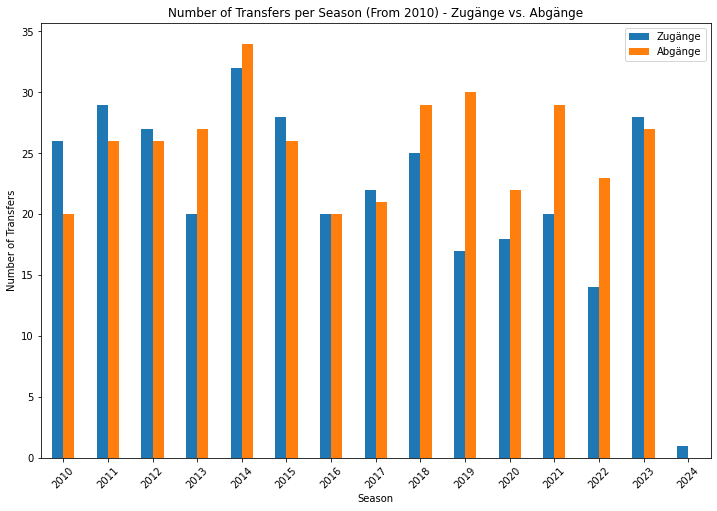

In [35]:
# Group by season and transfer type, then count the number of records for each category
transfers_count= df_transfers.groupby(['Season Adjusted', 'Transfer Type'])['Player Name'].count().unstack()

# Filter for seasons from 2010 onwards
transfers_count_filtered = transfers_count[transfers_count.index >= 2010]

# Plotting the raw number of 'Zugänge' and 'Abgänge'
transfers_count_filtered[['Zugänge', 'Abgänge']].plot(kind='bar', figsize=(12, 8))

plt.title('Number of Transfers per Season (From 2010) - Zugänge vs. Abgänge')
plt.xlabel('Season')
plt.ylabel('Number of Transfers')
plt.xticks(rotation=45)
plt.legend(['Zugänge', 'Abgänge'])
plt.show()


In [36]:
# Calculate the difference between 'Zugänge' and 'Abgänge' for each season
transfers_count_filtered['Difference'] = transfers_count_filtered['Zugänge'] - transfers_count_filtered['Abgänge']

# Inspect the new DataFrame to see the difference
print(transfers_count_filtered[['Zugänge', 'Abgänge', 'Difference']])

Transfer Type    Zugänge  Abgänge  Difference
Season Adjusted                              
2010                26.0     20.0         6.0
2011                29.0     26.0         3.0
2012                27.0     26.0         1.0
2013                20.0     27.0        -7.0
2014                32.0     34.0        -2.0
2015                28.0     26.0         2.0
2016                20.0     20.0         0.0
2017                22.0     21.0         1.0
2018                25.0     29.0        -4.0
2019                17.0     30.0       -13.0
2020                18.0     22.0        -4.0
2021                20.0     29.0        -9.0
2022                14.0     23.0        -9.0
2023                28.0     27.0         1.0
2024                 1.0      NaN         NaN


C:\Users\johan\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Course of Transfer Fees


Comparison of the tranfer fees between Arrivals & Departures 
using a stacked bar chart

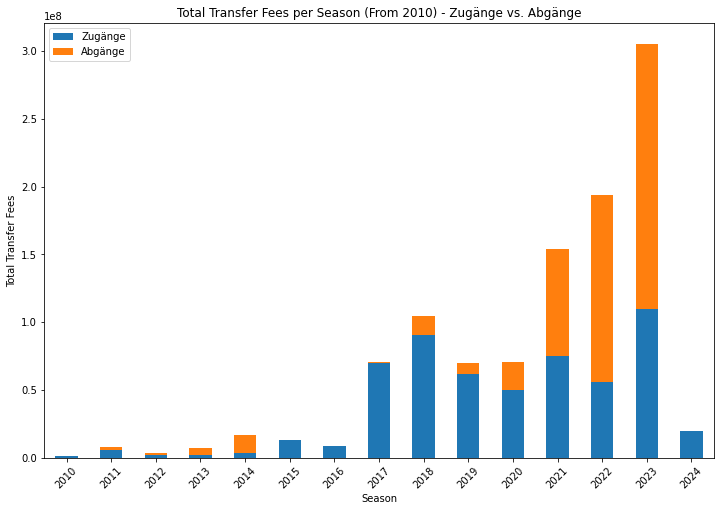

In [37]:
# Selecting only the 'Zugänge' and 'Abgänge' columns for the plot
transfer_fees_filtered[['Zugänge', 'Abgänge']].plot(kind='bar', stacked=True, figsize=(12, 8))

plt.title('Total Transfer Fees per Season (From 2010) - Zugänge vs. Abgänge')
plt.xlabel('Season')
plt.ylabel('Total Transfer Fees')
plt.xticks(rotation=45)
plt.legend(['Zugänge', 'Abgänge'])
plt.show()

## Course of Profit
Displaying the course and development of profit BHA has made until today (starting from 2010)
using a dotted line plot

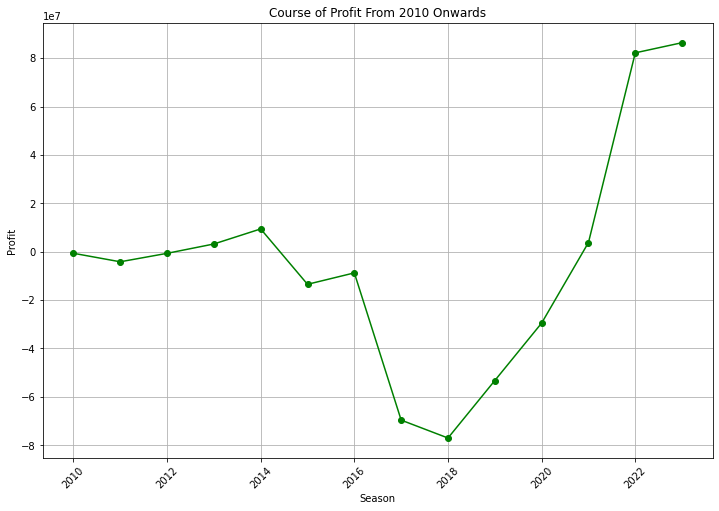

In [38]:
# Calculate profit as fees from 'Abgänge' minus fees for 'Zugänge'
transfer_fees['Profit'] = transfer_fees.get('Abgänge', 0) - transfer_fees.get('Zugänge', 0)

# Filter for seasons from 2010 onwards
profit_filtered = transfer_fees[transfer_fees.index >= 2010]['Profit']

# Plotting the course of profit
plt.figure(figsize=(12, 8))
profit_filtered.plot(kind='line', marker='o', color='green')
plt.title('Course of Profit From 2010 Onwards')
plt.xlabel('Season')
plt.ylabel('Profit')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


In [39]:
df_transfers

,Season,Transfer Type,Player Name,From/To Club,Fee,Season Adjusted
0,24/25,Zugänge,Ibrahim Osman,Nordsjaelland,19500000.0,2024
1,23/24,Zugänge,João Pedro,FC Watford,34200000.0,2023
2,23/24,Zugänge,Carlos Baleba,LOSC Lille,27000000.0,2023
3,23/24,Zugänge,Bart Verbruggen,RSC Anderlecht,20000000.0,2023
4,23/24,Zugänge,Igor,AC Florenz,16150000.0,2023
...,...,...,...,...,...,...
1809,1906/07,Abgänge,Chris Buckley,Aston Villa,0.0,1906
1810,1905/06,Zugänge,Walter Anthony,Nottm Forest,0.0,1905
1811,1905/06,Zugänge,Chris Buckley,Man City U18,0.0,1905
1812,1905/06,Abgänge,Frank Buckley,Manchester Utd.,0.0,1905


In [40]:
transfer_fees_filtered

Transfer Type,Abgänge,Zugänge,Profit
Season Adjusted,,,
2010,485000.0,1130000.0,-645000.0
2011,1867000.0,6030000.0,-4163000.0
2012,1510000.0,2180000.0,-670000.0
2013,5195000.0,2000000.0,3195000.0
2014,13220000.0,3800000.0,9420000.0
2015,0.0,13470000.0,-13470000.0
2016,0.0,8750000.0,-8750000.0
2017,400000.0,70000000.0,-69600000.0
2018,13620000.0,90620000.0,-77000000.0


## Cumulative Frequency
Trends in transfer fee data from 2010 to 2024

The cumulative frequency:

y1 = x1 + x2

y2 = x1 + x2 + x3

y3 = x1 + x2 + x3 +x4

Aufgrund des kumulativen und stetigen summierenden und wachsenden Effekts kann man gut erkennen,
wann größere Wendepunkte im Form höhere Ausgaben oder Einnahmen auftreten.

<Figure size 720x432 with 0 Axes>

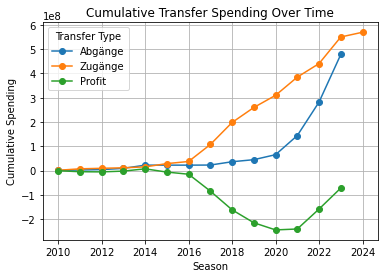

In [41]:
cumulative_spending = transfer_fees_filtered.cumsum()

plt.figure(figsize=(10, 6))
cumulative_spending.plot(kind='line', marker='o')
plt.title('Cumulative Transfer Spending Over Time')
plt.xlabel('Season')
plt.ylabel('Cumulative Spending')
plt.grid(True)
plt.show()

In [42]:
cumulative_spending

Transfer Type,Abgänge,Zugänge,Profit
Season Adjusted,,,
2010,485000.0,1130000.0,-645000.0
2011,2352000.0,7160000.0,-4808000.0
2012,3862000.0,9340000.0,-5478000.0
2013,9057000.0,11340000.0,-2283000.0
2014,22277000.0,15140000.0,7137000.0
2015,22277000.0,28610000.0,-6333000.0
2016,22277000.0,37360000.0,-15083000.0
2017,22677000.0,107360000.0,-84683000.0
2018,36297000.0,197980000.0,-161683000.0


In [43]:
transfer_fees_filtered

Transfer Type,Abgänge,Zugänge,Profit
Season Adjusted,,,
2010,485000.0,1130000.0,-645000.0
2011,1867000.0,6030000.0,-4163000.0
2012,1510000.0,2180000.0,-670000.0
2013,5195000.0,2000000.0,3195000.0
2014,13220000.0,3800000.0,9420000.0
2015,0.0,13470000.0,-13470000.0
2016,0.0,8750000.0,-8750000.0
2017,400000.0,70000000.0,-69600000.0
2018,13620000.0,90620000.0,-77000000.0


In [44]:
#pip install --upgrade seaborn matplotlib

# Subplot creation of the main figures:

The goal is to summarize the most important figures in one plot
and to give them Brighton & Hove Albion club-like colors 

In [45]:
# Filter out the year 2024 from the datasets
transfers_count_filtered = transfers_count_filtered[transfers_count_filtered.index != 2024]
transfer_fees_filtered = transfer_fees_filtered[transfer_fees_filtered.index != 2024]
profit_filtered = profit_filtered[profit_filtered.index != 2024]
cumulative_spending = cumulative_spending[cumulative_spending.index != 2024]

In [46]:
# Brighton's color scheme for plotting
brighton_blue = "#0057B8"  # Blue
brighton_light_blue = "#ADD8E6"  # Light Blue
brighton_accent = "#FFCD00"  # Accent color for differentiation

In [47]:
# Find the positions of the 2016 and 2017 bars
position_2016 = list(transfers_count_filtered.index).index(2016)  # Find index of 2016
position_2017 = list(transfers_count_filtered.index).index(2017)  # Find index of 2017
x_position_bar = (position_2016 + position_2017) / 2  # Average position between 2016 and 2017 bars

# Adjustments for the red vertical line
# Determine the x-axis position for the year between 2016 and 2017
x_position = 2016.5

In [48]:
import matplotlib.lines as mlines


# Define colors for each category for consistency across plots
colors = {'Zugänge': brighton_blue, 'Abgänge': brighton_accent}  # Mapping terms to chosen colors
english_terms = {'Zugänge': 'Arrivals', 'Abgänge': 'Departures'}  # German to English.... finally !!!



# Creating legend entries
arrival_legend = mlines.Line2D([], [], color=colors['Zugänge'], marker='o', linestyle='None', label='Arrivals')
departure_legend = mlines.Line2D([], [], color=colors['Abgänge'], marker='o', linestyle='None', label='Departures')
red_line_legend = mlines.Line2D([], [], color='red', linestyle='--', label='Transition to EPL')

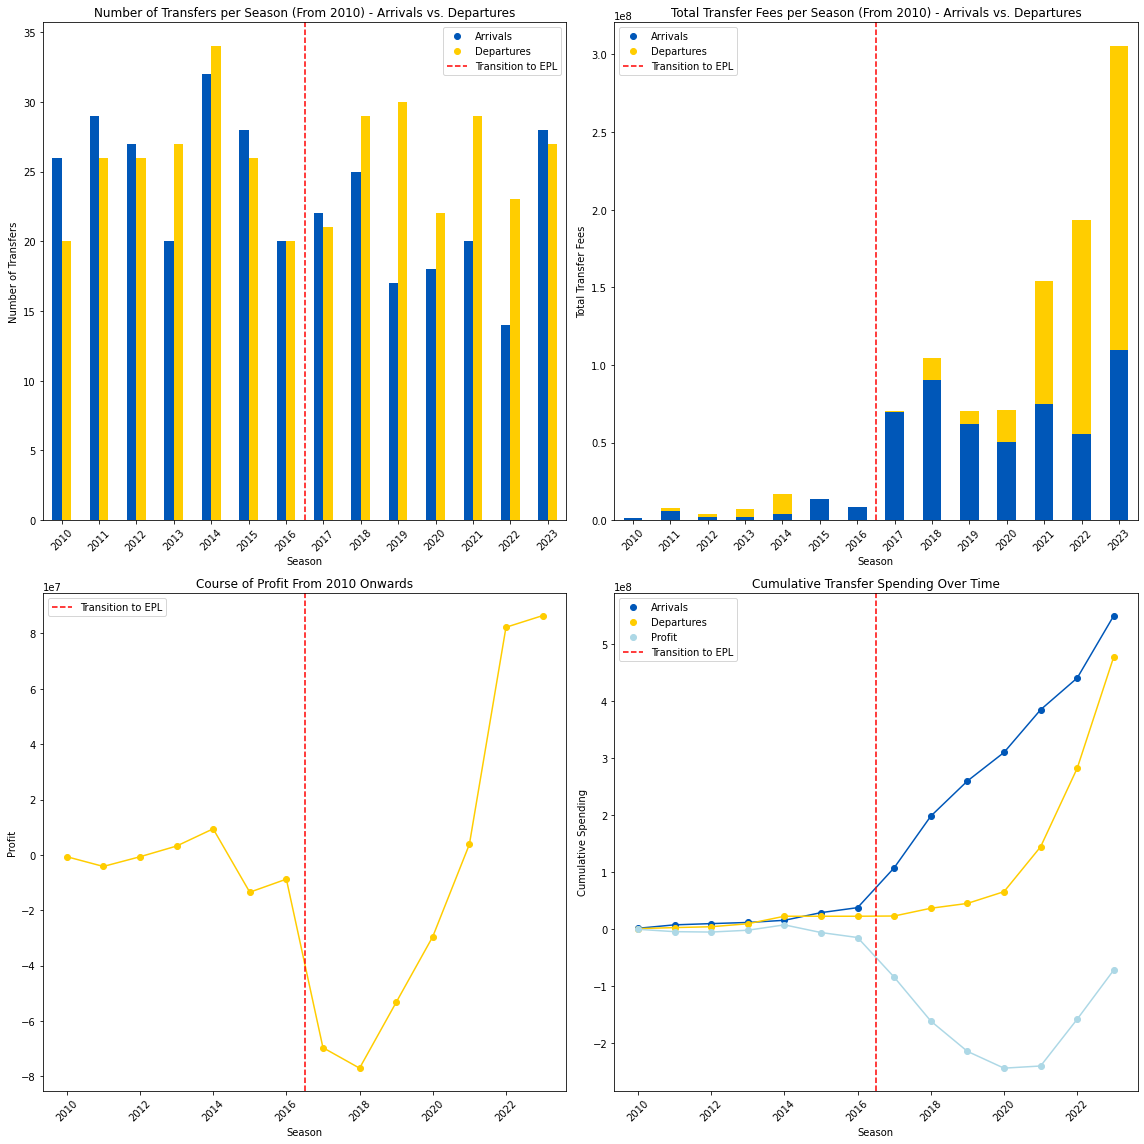

In [49]:
# Creating a 2x2 subplot with Matplotlib
fig, axs = plt.subplots(2, 2, figsize=(16, 16))


# Plot 1: Number of Transfers per Season (Top-Left)
# Changing the legend to English terms and applying colors directly
transfers_count_filtered[['Zugänge', 'Abgänge']].plot(kind='bar', color=[colors['Zugänge'], colors['Abgänge']], ax=axs[0, 0])
axs[0, 0].axvline(x=x_position_bar, color='red', linestyle='--')
axs[0, 0].set_title('Number of Transfers per Season (From 2010) - Arrivals vs. Departures')
axs[0, 0].set_xlabel('Season')
axs[0, 0].set_ylabel('Number of Transfers')
axs[0, 0].tick_params(axis='x', rotation=45)
axs[0, 0].legend(handles=[arrival_legend, departure_legend, red_line_legend])



# Plot 2: Total Transfer Fees per Season (Top-Right)
transfer_fees_filtered[['Zugänge', 'Abgänge']].plot(kind='bar', stacked=True, color=[colors['Zugänge'], colors['Abgänge']], ax=axs[0, 1])
axs[0, 1].axvline(x=x_position_bar, color='red', linestyle='--')
axs[0, 1].set_title('Total Transfer Fees per Season (From 2010) - Arrivals vs. Departures')
axs[0, 1].set_xlabel('Season')
axs[0, 1].set_ylabel('Total Transfer Fees')
axs[0, 1].tick_params(axis='x', rotation=45)
axs[0, 1].legend(handles=[arrival_legend, departure_legend, red_line_legend])



# Plot 3: Course of Profit From 2010 Onwards (Bottom-Left)
profit_filtered.plot(kind='line', marker='o', color=brighton_accent, ax=axs[1, 0])
axs[1, 0].axvline(x=2016.5, color='red', linestyle='--')  # Keep the red line as is
axs[1, 0].set_title('Course of Profit From 2010 Onwards')
axs[1, 0].set_xlabel('Season')
axs[1, 0].set_ylabel('Profit')
axs[1, 0].grid(False)
axs[1, 0].tick_params(axis='x', rotation=45)
axs[1, 0].legend(handles=[red_line_legend])



# Plot 4: Cumulative Transfer Spending Over Time (Bottom-Right)
# Assuming cumulative_spending plotting is correct; just ensure to include the red line
axs[1, 1].plot(cumulative_spending.index, cumulative_spending['Zugänge'], marker='o', color=colors['Zugänge'], label=english_terms['Zugänge'])
axs[1, 1].plot(cumulative_spending.index, cumulative_spending['Abgänge'], marker='o', color=colors['Abgänge'], label=english_terms['Abgänge'])
# 'Profit' can be directly derived / is already a part of cumulative_spending
if 'Profit' in cumulative_spending.columns:
    axs[1, 1].plot(cumulative_spending.index, cumulative_spending['Profit'], marker='o', color=brighton_light_blue, label='Profit')

axs[1, 1].axvline(x=2016.5, color='red', linestyle='--')  # Add red line

axs[1, 1].set_title('Cumulative Transfer Spending Over Time')
axs[1, 1].set_xlabel('Season')
axs[1, 1].set_ylabel('Cumulative Spending')
axs[1, 1].grid(False)
axs[1, 1].tick_params(axis='x', rotation=45)
axs[1, 1].legend(handles=[arrival_legend, departure_legend, mlines.Line2D([], [], color=brighton_light_blue, marker='o', linestyle='None', label='Profit'), red_line_legend])

plt.tight_layout()

#plt.savefig('transfers_overview.png', format='png', dpi=300)  # Save as high-quality PNG

plt.show()

In [50]:
# Convert to long format
transfers_count_long = transfers_count_filtered.reset_index().melt(id_vars='Season Adjusted', var_name='Transfer Type', value_name='Count')

# Verify the structure
print(transfers_count_long.head())

   Season Adjusted Transfer Type  Count
0             2010       Abgänge   20.0
1             2011       Abgänge   26.0
2             2012       Abgänge   26.0
3             2013       Abgänge   27.0
4             2014       Abgänge   34.0


## Top Transfers:


Arrivals & Departures finally nicely formatted and ready to use:

In [51]:
top_transfers_off = df_transfers[df_transfers["Transfer Type"] == "Abgänge"].sort_values(by='Fee', ascending=False).head(10)
print(top_transfers_off[['Season Adjusted', 'Player Name', 'From/To Club', 'Fee']])

     Season Adjusted          Player Name    From/To Club          Fee
29              2023       Moisés Caicedo      FC Chelsea  116000000.0
70              2022       Marc Cucurella      FC Chelsea   65300000.0
113             2021            Ben White      FC Arsenal   58500000.0
30              2023  Alexis Mac Allister    FC Liverpool   42000000.0
71              2022        Yves Bissouma       Tottenham   29200000.0
31              2023       Robert Sánchez      FC Chelsea   28700000.0
72              2022     Leandro Trossard      FC Arsenal   24000000.0
114             2021             Dan Burn  Newcastle Utd.   15000000.0
73              2022          Neal Maupay      FC Everton   11800000.0
160             2020    Anthony Knockaert       FC Fulham   11700000.0


In [52]:
top_transfers_on = df_transfers[df_transfers["Transfer Type"] == "Zugänge"].sort_values(by='Fee', ascending=False).head(10)
print(top_transfers_on[['Season Adjusted', 'Player Name', 'From/To Club', 'Fee']])

     Season Adjusted          Player Name    From/To Club         Fee
1               2023           João Pedro      FC Watford  34200000.0
142             2020       Moisés Caicedo   Independiente  28200000.0
2               2023        Carlos Baleba      LOSC Lille  27000000.0
93              2021          Enock Mwepu     RB Salzburg  23000000.0
229             2018  Alireza Jahanbakhsh      AZ Alkmaar  22500000.0
182             2019         Adam Webster    Bristol City  22220000.0
3               2023      Bart Verbruggen  RSC Anderlecht  20000000.0
0               2024        Ibrahim Osman   Nordsjaelland  19500000.0
283             2017       José Izquierdo       FC Brügge  18000000.0
94              2021       Marc Cucurella       FC Getafe  18000000.0


## Most involved Clubs:

In [53]:
# Concatenate "From/To Clubs"
most_involved_clubs = df_transfers['From/To Club'].value_counts().head(10)
print(most_involved_clubs)

Brighton U18      48
Karriereende      46
FC Fulham         33
Charlton Athl.    31
Unbekannt         25
Newcastle Utd.    25
FC Arsenal        24
Bognor Regis      24
QPR               24
FC Chelsea        23
Name: From/To Club, dtype: int64


In [54]:
df_transfers[df_transfers['From/To Club'] == "Brighton U23"]

,Season,Transfer Type,Player Name,From/To Club,Fee,Season Adjusted
103,21/22,Zugänge,Taylor Richards,Brighton U23,0.0,2021
104,21/22,Zugänge,Haydon Roberts,Brighton U23,0.0,2021
150,20/21,Zugänge,Robert Sánchez,Brighton U23,0.0,2020
194,19/20,Zugänge,Aaron Connolly,Brighton U23,0.0,2019
195,19/20,Zugänge,Steven Alzate,Brighton U23,0.0,2019
247,18/19,Zugänge,Ben White,Brighton U23,0.0,2018
337,16/17,Zugänge,Rob Hunt,Brighton U23,0.0,2016


## Key signigns:

In [55]:
# CSV file path
csv_file_path = 'key_signings.csv'

# Load the CSV into DataFrame
key_signings_df = pd.read_csv(csv_file_path)

# Display the DataFrame to verify it's loaded correctly
print(key_signings_df)

   Season Adjusted          Player Name    From/To Club         Fee  \
0             2023           João Pedro      FC Watford  34200000.0   
1             2020       Moisés Caicedo   Independiente  28200000.0   
2             2023        Carlos Baleba      LOSC Lille  27000000.0   
3             2021          Enock Mwepu     RB Salzburg  23000000.0   
4             2018  Alireza Jahanbakhsh      AZ Alkmaar  22500000.0   
5             2019         Adam Webster    Bristol City  22200000.0   
6             2023      Bart Verbruggen  RSC Anderlecht  20000000.0   
7             2024        Ibrahim Osman   Nordsjaelland  19500000.0   
8             2021       Marc Cucurella          Getafe  18000000.0   
9             2017       José Izquierdo       FC Brugge  18000000.0   

   Current Market Value   Age  Einsätze (Appearances)_firstseason  \
0            45000000.0  22.0                                32.0   
1                   NaN  18.0                                10.0   
2          

In [56]:
# Rename columns
key_signings_df.rename(columns={'From/To Club': 'From Club', 'Einsätze (Appearances)_firstseason': 'Appearances_firstseason',
                                'Eingesetzte Minuten (Minutes Played)_firstseason': 'MinutesPlayed_firstseason',}, inplace=True)

In [57]:
# Set option to display all columns
pd.set_option('display.max_columns', None)

key_signings_df

,Season Adjusted,Player Name,From Club,Fee,Current Market Value,Age,Appearances_firstseason,MinutesPlayed_firstseason,Goals_firstseason,Assists_firstseason,Position,Strategy,Total Goals,Total Assists,Total Appearances,Total Seasons,Total Minutes Played,Average PPS,PPS_firstseason
0,2023,João Pedro,FC Watford,34200000.0,45000000.0,22.0,32.0,2090.0,19.0,2.0,Center Forward,Attack,19.0,2.0,32.0,1,2090.0,1.690,1.69
1,2020,Moisés Caicedo,Independiente,28200000.0,NaN,18.0,10.0,783.0,1.0,2.0,Defensive Midfielder,Midfield,2.0,3.0,53.0,2,4448.0,1.860,2.00
2,2023,Carlos Baleba,LOSC Lille,27000000.0,NaN,20.0,27.0,922.0,0.0,0.0,Defensive Midfielder,Midfield,0.0,0.0,27.0,1,922.0,1.630,1.63
3,2021,Enock Mwepu,RB Salzburg,23000000.0,NaN,23.0,21.0,1147.0,3.0,6.0,Central Midfielder,Midfield,3.0,7.0,27.0,2,1358.0,2.015,1.86
4,2018,Alireza Jahanbakhsh,AZ Alkmaar,22500000.0,NaN,24.0,24.0,1432.0,0.0,0.0,Right Winger,Attack,4.0,2.0,61.0,3,2647.0,1.070,1.13
5,2019,Adam Webster,Bristol City,22200000.0,NaN,24.0,37.0,2850.0,3.0,1.0,Center Back,Defense,7.0,2.0,137.0,5,9529.0,1.492,1.09
6,2023,Bart Verbruggen,RSC Anderlecht,20000000.0,NaN,21.0,19.0,1710.0,NaN,NaN,Goalkeeper,Defense,0.0,0.0,19.0,1,1710.0,2.000,2.00
7,2024,Ibrahim Osman,Nordsjaelland,19500000.0,NaN,26.0,NaN,NaN,NaN,NaN,Left Winger,Attack,0.0,0.0,0.0,0,0.0,NaN,NaN
8,2021,Marc Cucurella,Getafe,18000000.0,NaN,22.0,38.0,3268.0,1.0,2.0,Left Back,Defense,1.0,2.0,38.0,1,3268.0,1.260,1.26
9,2017,José Izquierdo,FC Brugge,18000000.0,NaN,24.0,54.0,3101.0,5.0,6.0,Left Winger,Attack,5.0,6.0,54.0,3,3101.0,0.830,1.08


In [58]:
key_signings_df

,Season Adjusted,Player Name,From Club,Fee,Current Market Value,Age,Appearances_firstseason,MinutesPlayed_firstseason,Goals_firstseason,Assists_firstseason,Position,Strategy,Total Goals,Total Assists,Total Appearances,Total Seasons,Total Minutes Played,Average PPS,PPS_firstseason
0,2023,João Pedro,FC Watford,34200000.0,45000000.0,22.0,32.0,2090.0,19.0,2.0,Center Forward,Attack,19.0,2.0,32.0,1,2090.0,1.690,1.69
1,2020,Moisés Caicedo,Independiente,28200000.0,NaN,18.0,10.0,783.0,1.0,2.0,Defensive Midfielder,Midfield,2.0,3.0,53.0,2,4448.0,1.860,2.00
2,2023,Carlos Baleba,LOSC Lille,27000000.0,NaN,20.0,27.0,922.0,0.0,0.0,Defensive Midfielder,Midfield,0.0,0.0,27.0,1,922.0,1.630,1.63
3,2021,Enock Mwepu,RB Salzburg,23000000.0,NaN,23.0,21.0,1147.0,3.0,6.0,Central Midfielder,Midfield,3.0,7.0,27.0,2,1358.0,2.015,1.86
4,2018,Alireza Jahanbakhsh,AZ Alkmaar,22500000.0,NaN,24.0,24.0,1432.0,0.0,0.0,Right Winger,Attack,4.0,2.0,61.0,3,2647.0,1.070,1.13
5,2019,Adam Webster,Bristol City,22200000.0,NaN,24.0,37.0,2850.0,3.0,1.0,Center Back,Defense,7.0,2.0,137.0,5,9529.0,1.492,1.09
6,2023,Bart Verbruggen,RSC Anderlecht,20000000.0,NaN,21.0,19.0,1710.0,NaN,NaN,Goalkeeper,Defense,0.0,0.0,19.0,1,1710.0,2.000,2.00
7,2024,Ibrahim Osman,Nordsjaelland,19500000.0,NaN,26.0,NaN,NaN,NaN,NaN,Left Winger,Attack,0.0,0.0,0.0,0,0.0,NaN,NaN
8,2021,Marc Cucurella,Getafe,18000000.0,NaN,22.0,38.0,3268.0,1.0,2.0,Left Back,Defense,1.0,2.0,38.0,1,3268.0,1.260,1.26
9,2017,José Izquierdo,FC Brugge,18000000.0,NaN,24.0,54.0,3101.0,5.0,6.0,Left Winger,Attack,5.0,6.0,54.0,3,3101.0,0.830,1.08


Checked Transfermark.de and added some other valuable players manually:

In [59]:
# Definition of the data for the new players

new_players_data = [

    {

        'Season Adjusted': 2023, 'Player Name': 'Igor', 'From Club': 'AC Florenz', 'Fee': 16150000,

        'Current Market Value': 17000000, 'Age': 26, 'Appearances_firstseason': 25,

        'MinutesPlayed_firstseason': 1649, 'Goals_firstseason': 0, 'Assists_firstseason': 0,

        'Position': 'Center Back', 'Strategy': 'Defense', 'Total Goals': 0, 'Total Assists': 0,

        'Total Appearances': 25, 'Total Seasons': 1, 'Total Minutes Played': 1649, 'Average PPS': 1.48,

        'PPS_firstseason': 1.48

    },

    {

        'Season Adjusted': 2023, 'Player Name': 'Ansu Fati', 'From Club': 'FC Barcelona', 'Fee': 0,

        'Current Market Value': 30000000, 'Age': 21, 'Appearances_firstseason': 23,

        'MinutesPlayed_firstseason': 949, 'Goals_firstseason': 4, 'Assists_firstseason': 1,

        'Position': 'Left Winger', 'Strategy': 'Attack', 'Total Goals': 4, 'Total Assists': 1,

        'Total Appearances': 23, 'Total Seasons': 1, 'Total Minutes Played': 949, 'Average PPS': 1.43,

        'PPS_firstseason': 1.43

    }

]


Exclude Ibrahim Osman because he hasnt played yet and we only want to include key signigns who already have accumulated performance data 

In [60]:
key_signings_df_new = key_signings_df[key_signings_df['Player Name'] != 'Ibrahim Osman']

In [61]:
key_signings_df_new

,Season Adjusted,Player Name,From Club,Fee,Current Market Value,Age,Appearances_firstseason,MinutesPlayed_firstseason,Goals_firstseason,Assists_firstseason,Position,Strategy,Total Goals,Total Assists,Total Appearances,Total Seasons,Total Minutes Played,Average PPS,PPS_firstseason
0,2023,João Pedro,FC Watford,34200000.0,45000000.0,22.0,32.0,2090.0,19.0,2.0,Center Forward,Attack,19.0,2.0,32.0,1,2090.0,1.690,1.69
1,2020,Moisés Caicedo,Independiente,28200000.0,NaN,18.0,10.0,783.0,1.0,2.0,Defensive Midfielder,Midfield,2.0,3.0,53.0,2,4448.0,1.860,2.00
2,2023,Carlos Baleba,LOSC Lille,27000000.0,NaN,20.0,27.0,922.0,0.0,0.0,Defensive Midfielder,Midfield,0.0,0.0,27.0,1,922.0,1.630,1.63
3,2021,Enock Mwepu,RB Salzburg,23000000.0,NaN,23.0,21.0,1147.0,3.0,6.0,Central Midfielder,Midfield,3.0,7.0,27.0,2,1358.0,2.015,1.86
4,2018,Alireza Jahanbakhsh,AZ Alkmaar,22500000.0,NaN,24.0,24.0,1432.0,0.0,0.0,Right Winger,Attack,4.0,2.0,61.0,3,2647.0,1.070,1.13
5,2019,Adam Webster,Bristol City,22200000.0,NaN,24.0,37.0,2850.0,3.0,1.0,Center Back,Defense,7.0,2.0,137.0,5,9529.0,1.492,1.09
6,2023,Bart Verbruggen,RSC Anderlecht,20000000.0,NaN,21.0,19.0,1710.0,NaN,NaN,Goalkeeper,Defense,0.0,0.0,19.0,1,1710.0,2.000,2.00
8,2021,Marc Cucurella,Getafe,18000000.0,NaN,22.0,38.0,3268.0,1.0,2.0,Left Back,Defense,1.0,2.0,38.0,1,3268.0,1.260,1.26
9,2017,José Izquierdo,FC Brugge,18000000.0,NaN,24.0,54.0,3101.0,5.0,6.0,Left Winger,Attack,5.0,6.0,54.0,3,3101.0,0.830,1.08


In [62]:
new_players_df = pd.DataFrame(new_players_data)

In [63]:
new_players_df

,Season Adjusted,Player Name,From Club,Fee,Current Market Value,Age,Appearances_firstseason,MinutesPlayed_firstseason,Goals_firstseason,Assists_firstseason,Position,Strategy,Total Goals,Total Assists,Total Appearances,Total Seasons,Total Minutes Played,Average PPS,PPS_firstseason
0,2023,Igor,AC Florenz,16150000,17000000,26,25,1649,0,0,Center Back,Defense,0,0,25,1,1649,1.48,1.48
1,2023,Ansu Fati,FC Barcelona,0,30000000,21,23,949,4,1,Left Winger,Attack,4,1,23,1,949,1.43,1.43


In [64]:
df_key_signings_updated = pd.concat([key_signings_df_new, new_players_df], ignore_index=True)

## Final key signings & preliminary analysis performance:

### Creation of Box-Plots to visualize single metrics

In [65]:
df_key_signings_updated

,Season Adjusted,Player Name,From Club,Fee,Current Market Value,Age,Appearances_firstseason,MinutesPlayed_firstseason,Goals_firstseason,Assists_firstseason,Position,Strategy,Total Goals,Total Assists,Total Appearances,Total Seasons,Total Minutes Played,Average PPS,PPS_firstseason
0,2023,João Pedro,FC Watford,34200000.0,45000000.0,22.0,32.0,2090.0,19.0,2.0,Center Forward,Attack,19.0,2.0,32.0,1,2090.0,1.690,1.69
1,2020,Moisés Caicedo,Independiente,28200000.0,NaN,18.0,10.0,783.0,1.0,2.0,Defensive Midfielder,Midfield,2.0,3.0,53.0,2,4448.0,1.860,2.00
2,2023,Carlos Baleba,LOSC Lille,27000000.0,NaN,20.0,27.0,922.0,0.0,0.0,Defensive Midfielder,Midfield,0.0,0.0,27.0,1,922.0,1.630,1.63
3,2021,Enock Mwepu,RB Salzburg,23000000.0,NaN,23.0,21.0,1147.0,3.0,6.0,Central Midfielder,Midfield,3.0,7.0,27.0,2,1358.0,2.015,1.86
4,2018,Alireza Jahanbakhsh,AZ Alkmaar,22500000.0,NaN,24.0,24.0,1432.0,0.0,0.0,Right Winger,Attack,4.0,2.0,61.0,3,2647.0,1.070,1.13
5,2019,Adam Webster,Bristol City,22200000.0,NaN,24.0,37.0,2850.0,3.0,1.0,Center Back,Defense,7.0,2.0,137.0,5,9529.0,1.492,1.09
6,2023,Bart Verbruggen,RSC Anderlecht,20000000.0,NaN,21.0,19.0,1710.0,NaN,NaN,Goalkeeper,Defense,0.0,0.0,19.0,1,1710.0,2.000,2.00
7,2021,Marc Cucurella,Getafe,18000000.0,NaN,22.0,38.0,3268.0,1.0,2.0,Left Back,Defense,1.0,2.0,38.0,1,3268.0,1.260,1.26
8,2017,José Izquierdo,FC Brugge,18000000.0,NaN,24.0,54.0,3101.0,5.0,6.0,Left Winger,Attack,5.0,6.0,54.0,3,3101.0,0.830,1.08
9,2023,Igor,AC Florenz,16150000.0,17000000.0,26.0,25.0,1649.0,0.0,0.0,Center Back,Defense,0.0,0.0,25.0,1,1649.0,1.480,1.48


In [66]:
#df_key_signings_updated.to_csv("df_key_signings_updated", index=False)
#df_key_signings_updated.to_excel("df_key_signings_updated.xlsx", index=False)

In [67]:
df_key_signings_updated.describe()

,Season Adjusted,Fee,Current Market Value,Age,Appearances_firstseason,MinutesPlayed_firstseason,Goals_firstseason,Assists_firstseason,Total Goals,Total Assists,Total Appearances,Total Seasons,Total Minutes Played,Average PPS,PPS_firstseason
count,11.000000,1.100000e+01,3.000000e+00,11.000000,11.000000,11.000000,10.000000,10.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,2021.000000,2.084091e+07,3.066667e+07,22.272727,28.181818,1809.181818,3.600000,2.000000,4.090909,2.272727,45.090909,1.909091,2879.181818,1.523364,1.513636
std,2.236068,8.677638e+06,1.401190e+07,2.240130,11.737276,903.072845,5.699903,2.260777,5.448937,2.327699,33.601948,1.300350,2455.786262,0.372637,0.349979
min,2017.000000,0.000000e+00,1.700000e+07,18.000000,10.000000,783.000000,0.000000,0.000000,0.000000,0.000000,19.000000,1.000000,922.000000,0.830000,1.080000
25%,2019.500000,1.800000e+07,2.350000e+07,21.000000,22.000000,1048.000000,0.250000,0.250000,0.500000,0.500000,26.000000,1.000000,1503.500000,1.345000,1.195000
50%,2021.000000,2.220000e+07,3.000000e+07,22.000000,25.000000,1649.000000,2.000000,1.500000,3.000000,2.000000,32.000000,1.000000,2090.000000,1.492000,1.480000
75%,2023.000000,2.500000e+07,3.750000e+07,24.000000,34.500000,2470.000000,3.750000,2.000000,4.500000,2.500000,53.500000,2.500000,3184.500000,1.775000,1.775000
max,2023.000000,3.420000e+07,4.500000e+07,26.000000,54.000000,3268.000000,19.000000,6.000000,19.000000,7.000000,137.000000,5.000000,9529.000000,2.015000,2.000000


### Mean Fee of top signigns (loans excluded)

In [68]:
mean_fee = df_key_signings_updated[df_key_signings_updated['Player Name'] != 'Ansu Fati']['Fee'].mean()
mean_fee

22925000.0

### Mean Age of top signings

In [69]:
mean_age = df_key_signings_updated['Age'].mean()

In [70]:
mean_age

22.272727272727273

In [71]:
# Exclude "Ansu Fati" for the 'Fee' calculation
df_filtered = df_key_signings_updated[df_key_signings_updated['Player Name'] != 'Ansu Fati']

def plot_boxplot_for_column(df, column_name):
    """
    Plots a horizontal boxplot and stripplot for a specific column in the DataFrame.
    
    Parameters:
    - df: pandas DataFrame containing the data.
    - column_name: The name of the column to plot.
    """
    plt.figure(figsize=(10, 2))
    sns.boxplot(x=df[column_name], color='skyblue', showfliers=False, orient='h')
    sns.stripplot(x=df[column_name], color='orange', size=5, jitter=True, orient='h')
    plt.title(column_name)
    plt.show()

In [72]:
df_key_signings_updated.columns

Index(['Season Adjusted', 'Player Name', 'From Club', 'Fee',
       'Current Market Value', 'Age', 'Appearances_firstseason',
       'MinutesPlayed_firstseason', 'Goals_firstseason', 'Assists_firstseason',
       'Position', 'Strategy', 'Total Goals', 'Total Assists',
       'Total Appearances', 'Total Seasons', 'Total Minutes Played',
       'Average PPS', 'PPS_firstseason'],
      dtype='object')

# Box - Plots:


Visualization of single metrics to get a feeling for the ranges of: 
- Fee 
- Age 
- Appearances
- Minutes Played 
- Total Seasons played 

## Fee:

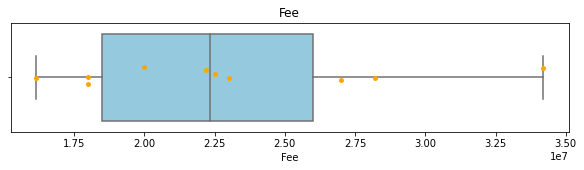

In [73]:
plot_boxplot_for_column(df_filtered, 'Fee')

## Age:

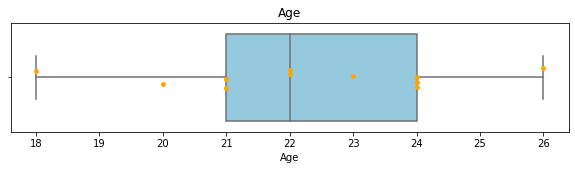

In [74]:
plot_boxplot_for_column(df_key_signings_updated, 'Age')

## Appearances:

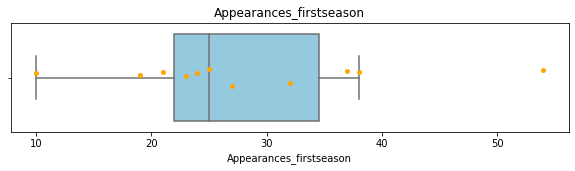

In [75]:
plot_boxplot_for_column(df_key_signings_updated, 'Appearances_firstseason')

In [76]:
df_key_signings_updated['Appearances_firstseason'].mean()

28.181818181818183

## Minutes Played:

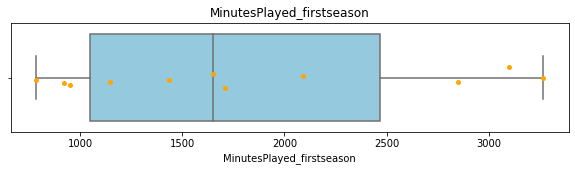

In [77]:
plot_boxplot_for_column(df_key_signings_updated, 'MinutesPlayed_firstseason')

In [78]:
df_key_signings_updated['MinutesPlayed_firstseason'].mean()

1809.1818181818182

In [79]:
1809 / 90

20.1

## Goals First Season:

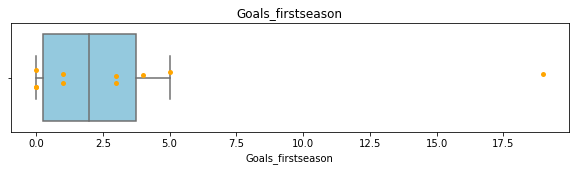

In [80]:
plot_boxplot_for_column(df_key_signings_updated, 'Goals_firstseason')

In [81]:
df_key_signings_updated['Goals_firstseason'].mean()

3.6

## Assists First Season:

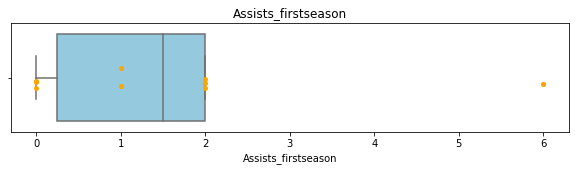

In [82]:
plot_boxplot_for_column(df_key_signings_updated, 'Assists_firstseason')

In [83]:
df_key_signings_updated['Assists_firstseason'].mean()

2.0

## Points per Play First Season:

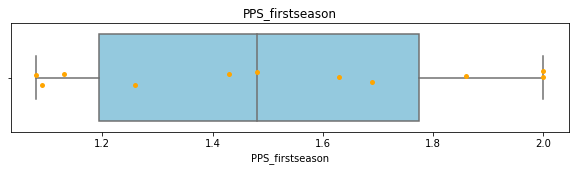

In [84]:
plot_boxplot_for_column(df_key_signings_updated, 'PPS_firstseason')

In [85]:
df_key_signings_updated['PPS_firstseason'].mean()

1.513636363636364

## Total Goals:

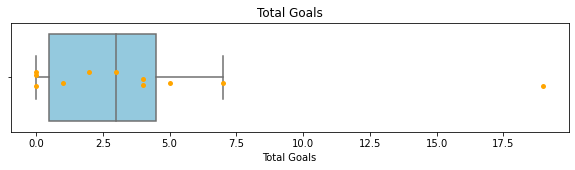

In [86]:
plot_boxplot_for_column(df_key_signings_updated, 'Total Goals')

In [87]:
df_key_signings_updated['Total Goals'].mean()

4.090909090909091

## Total Assists:

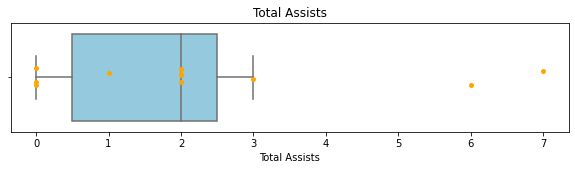

In [88]:
plot_boxplot_for_column(df_key_signings_updated, 'Total Assists')

In [89]:
df_key_signings_updated['Total Assists'].mean()

2.272727272727273

## Total Appearances:

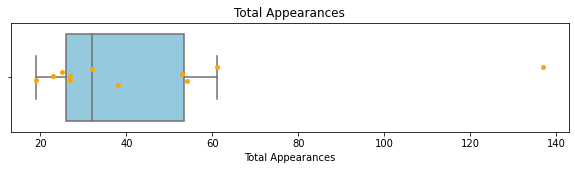

In [90]:
plot_boxplot_for_column(df_key_signings_updated, 'Total Appearances')

In [91]:
mean_total_appearances = df_key_signings_updated['Total Appearances'].mean()
print(mean_total_appearances)

45.09090909090909


## Total Seasons:

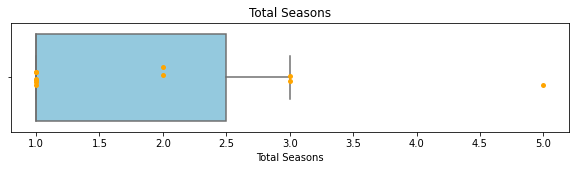

In [92]:
plot_boxplot_for_column(df_key_signings_updated, 'Total Seasons')

In [93]:
mean_total_seasons = df_key_signings_updated['Total Seasons'].mean()
print(mean_total_seasons)

1.9090909090909092


Appearances per Season: Total Appearances / Total Seasons:

In [94]:
mean_ppearances_per_season = mean_total_appearances / mean_total_seasons
print(mean_ppearances_per_season)

23.61904761904762


## Total Minutes Played:

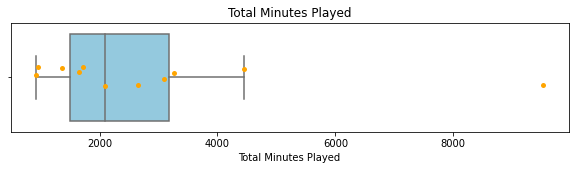

In [95]:
plot_boxplot_for_column(df_key_signings_updated, 'Total Minutes Played')

In [96]:
df_key_signings_updated['Total Minutes Played'].mean()

2879.181818181818

## Average Points per Play:

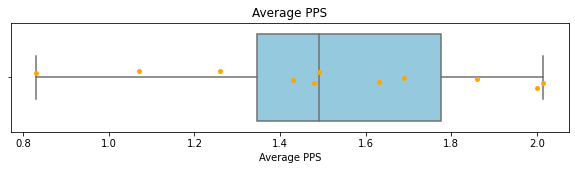

In [97]:
plot_boxplot_for_column(df_key_signings_updated, 'Average PPS')

In [98]:
df_key_signings_updated['Average PPS'].mean()

1.5233636363636365

In [99]:
df_key_signings_updated

,Season Adjusted,Player Name,From Club,Fee,Current Market Value,Age,Appearances_firstseason,MinutesPlayed_firstseason,Goals_firstseason,Assists_firstseason,Position,Strategy,Total Goals,Total Assists,Total Appearances,Total Seasons,Total Minutes Played,Average PPS,PPS_firstseason
0,2023,João Pedro,FC Watford,34200000.0,45000000.0,22.0,32.0,2090.0,19.0,2.0,Center Forward,Attack,19.0,2.0,32.0,1,2090.0,1.690,1.69
1,2020,Moisés Caicedo,Independiente,28200000.0,NaN,18.0,10.0,783.0,1.0,2.0,Defensive Midfielder,Midfield,2.0,3.0,53.0,2,4448.0,1.860,2.00
2,2023,Carlos Baleba,LOSC Lille,27000000.0,NaN,20.0,27.0,922.0,0.0,0.0,Defensive Midfielder,Midfield,0.0,0.0,27.0,1,922.0,1.630,1.63
3,2021,Enock Mwepu,RB Salzburg,23000000.0,NaN,23.0,21.0,1147.0,3.0,6.0,Central Midfielder,Midfield,3.0,7.0,27.0,2,1358.0,2.015,1.86
4,2018,Alireza Jahanbakhsh,AZ Alkmaar,22500000.0,NaN,24.0,24.0,1432.0,0.0,0.0,Right Winger,Attack,4.0,2.0,61.0,3,2647.0,1.070,1.13
5,2019,Adam Webster,Bristol City,22200000.0,NaN,24.0,37.0,2850.0,3.0,1.0,Center Back,Defense,7.0,2.0,137.0,5,9529.0,1.492,1.09
6,2023,Bart Verbruggen,RSC Anderlecht,20000000.0,NaN,21.0,19.0,1710.0,NaN,NaN,Goalkeeper,Defense,0.0,0.0,19.0,1,1710.0,2.000,2.00
7,2021,Marc Cucurella,Getafe,18000000.0,NaN,22.0,38.0,3268.0,1.0,2.0,Left Back,Defense,1.0,2.0,38.0,1,3268.0,1.260,1.26
8,2017,José Izquierdo,FC Brugge,18000000.0,NaN,24.0,54.0,3101.0,5.0,6.0,Left Winger,Attack,5.0,6.0,54.0,3,3101.0,0.830,1.08
9,2023,Igor,AC Florenz,16150000.0,17000000.0,26.0,25.0,1649.0,0.0,0.0,Center Back,Defense,0.0,0.0,25.0,1,1649.0,1.480,1.48


## Grouped Box-Plots: 

Grouping of Box-Plots for a more compact look

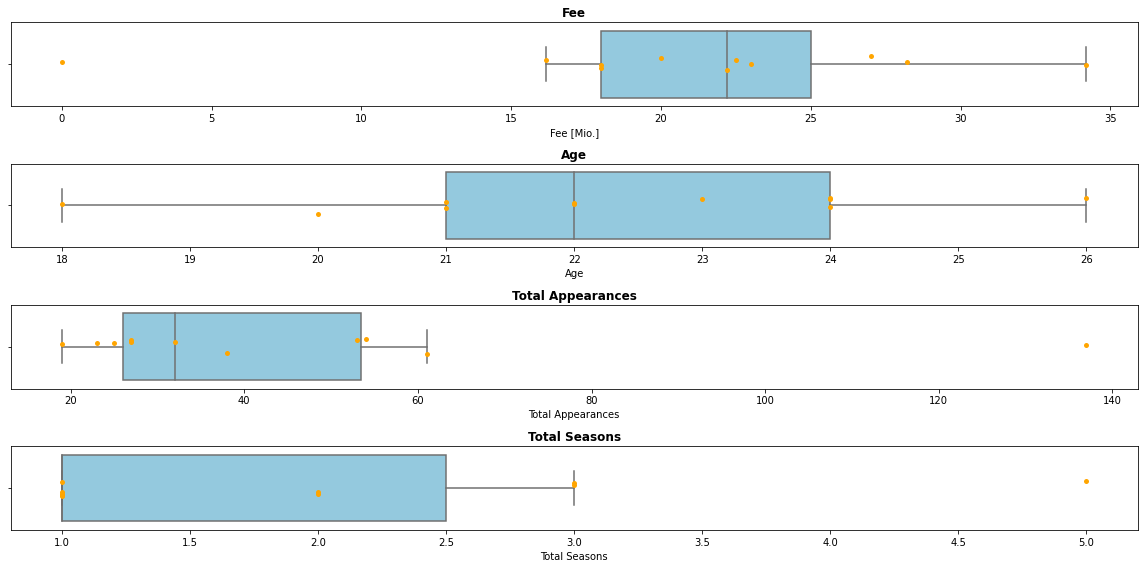

In [100]:
def plot_boxplots_in_grid(df, column_names):
    """
    Plots horizontal boxplots and stripplots for specific columns in the DataFrame arranged in a 4x1 grid.
    Scales the 'Fee' column for display in millions and adjusts the x-axis label accordingly.

    Parameters:
    - df: pandas DataFrame containing the data.
    - column_names: A list of the names of the columns to plot.
    """
    if len(column_names) != 4:
        raise ValueError("This function is designed to plot exactly 4 columns.")
    
    fig, axs = plt.subplots(4, 1, figsize=(16, 8))  # Adjust subplot size

    for i, column_name in enumerate(column_names):
        ax = axs[i]

        # Scale 'Fee' column data
        if column_name == 'Fee':
            # Make a copy to avoid modifying original DataFrame
            data_to_plot = df.copy()
            data_to_plot[column_name] = data_to_plot[column_name] / 1e6  # Convert to millions
            x_label = f'{column_name} [Mio.]'  # Customize x-axis label
        else:
            data_to_plot = df
            x_label = column_name

        sns.boxplot(x=data_to_plot[column_name], color='skyblue', showfliers=False, orient='h', ax=ax)
        sns.stripplot(x=data_to_plot[column_name], color='orange', size=5, jitter=True, orient='h', ax=ax)
        ax.set_title(column_name, fontweight='bold')
        ax.set_xlabel(x_label)  # Use customized x-axis label

    plt.tight_layout()  # Adjust the layout so titles and labels don't overlap
    plt.savefig('GeneralDataBoxPlots.png', format='png', dpi=300)  # Save as high-quality PNG
    plt.show()

# List of column names I want to plot
column_names_to_plot = ['Fee', 'Age', 'Total Appearances', 'Total Seasons']
plot_boxplots_in_grid(df_key_signings_updated, column_names_to_plot)


In [101]:
'Total Goals','Total Assists','Average PPS','Total Minutes Played'

('Total Goals', 'Total Assists', 'Average PPS', 'Total Minutes Played')

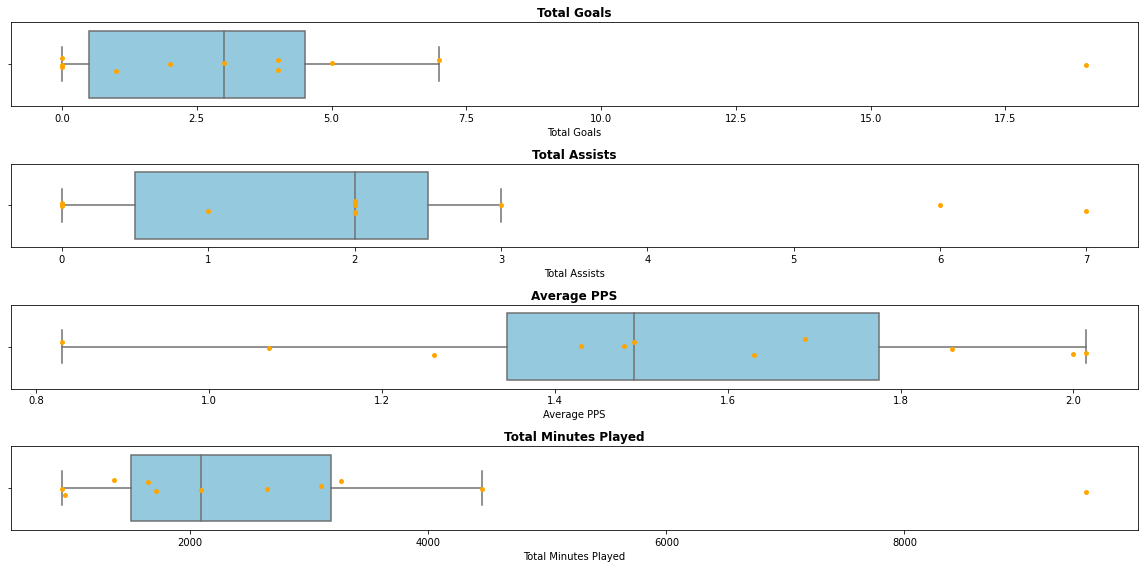

In [102]:
def plot_boxplots_in_grid(df, column_names):
    """
    Plots horizontal boxplots and stripplots for specific columns in the DataFrame arranged in a 2x4 grid.
    Excludes the last row for the 'Fee' column but includes it for all others.

    Parameters:
    - df: pandas DataFrame containing the data.
    - column_names: A list of the names of the columns to plot.
    """
    # Ensure we have exactly 8 columns to plot, as required for a 2x4 grid
    if len(column_names) != 4:
        raise ValueError("This function is designed to plot exactly 8 columns.")
    
    fig, axs = plt.subplots(4, 1, figsize=(16, 8))  # Adjust subplot size as needed
    axs = axs.flatten()  # Flatten the 2x4 array to easily index it

    for i, column_name in enumerate(column_names):
        ax = axs[i]

        # Use all data except the last row for 'Fee' column, otherwise use full data
        data_to_plot = df if column_name != 'Fee' else df[:-1]

        sns.boxplot(x=data_to_plot[column_name], color='skyblue', showfliers=False, orient='h', ax=ax)
        sns.stripplot(x=data_to_plot[column_name], color='orange', size=5, jitter=True, orient='h', ax=ax)
        ax.set_title(column_name, fontweight='bold')

    plt.tight_layout()  # Adjust the layout so titles and labels don't overlap
    plt.savefig('PerformanceBoxPlots.png', format='png', dpi=300)  # Save as high-quality PNG
    plt.show()

# List of column names I want to plot
column_names_to_plot = ['Total Goals', 'Total Assists','Average PPS','Total Minutes Played']
plot_boxplots_in_grid(df_key_signings_updated, column_names_to_plot)